In [194]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import math
import numpy as np
from numpy import asarray
from matplotlib.pyplot import figure

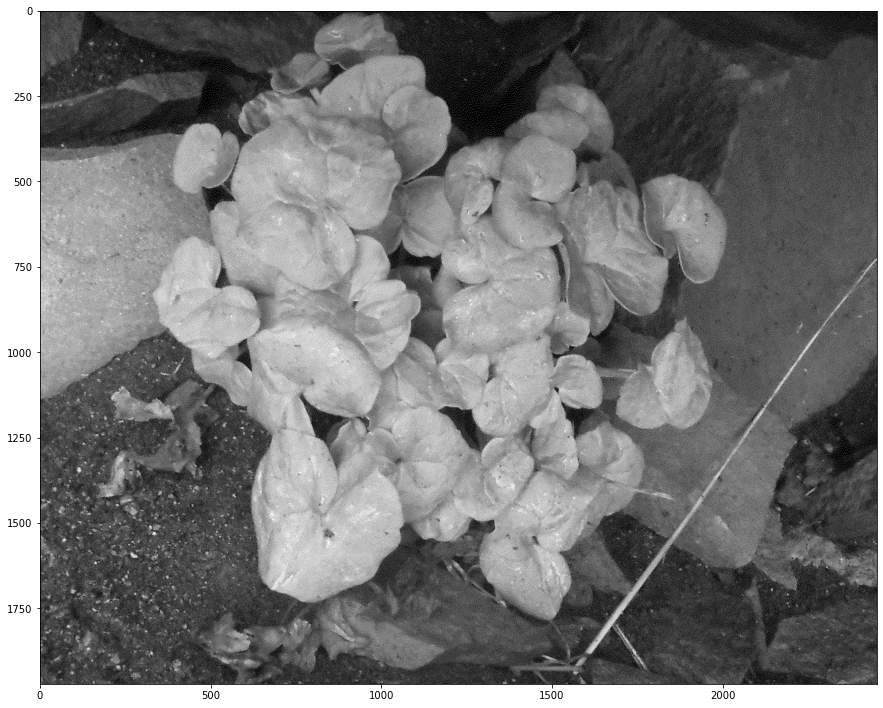

The shape of the image is: (1972, 2452)
False
0


In [203]:
im = Image.open(r"C:\Users\preet\Desktop\image_two.jpg")
im.thumbnail((10000, 10000))
im = im.crop((0, 0, 2452, 1972))

im = im.convert("1")
plt.figure(figsize=(15, 15))
jello = plt.imshow(im)

plt.show()


data = asarray(im)
n_H, n_W = data.shape

print("The shape of the image is: " + str(data.shape))
print(data[100][1200])
data = data.astype(int)   
print(data[100][1200])



In [176]:
G = np.array([[1,0,0,0,1,0,1],[0,1,0,0,1,1,0],[0,0,1,0,1,1,1],[0,0,0,1,0,1,1]])
print(G.T)

#Example: 

s = np.array([[1],[0],[0],[1]])
t = np.dot(G.T,s)%2

print(t)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 1 1 0]
 [0 1 1 1]
 [1 0 1 1]]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]


In [174]:
n_H,n_W = data.shape

new_h = int(n_H + n_H/4*3)

T = np.zeros((new_h,n_W))

h_start = 0
t_start_parity = 1972
t_start = 0

for w in range(n_W):
    
    for h in range(int(n_H/4)):
        slice_of_data = data[h_start:h_start+4, w:w+1]
        t = np.dot(G.T,slice_of_data)%2
        
        T[t_start:t_start+4,w:w+1] = T[t_start:t_start+4,w:w+1]+t[0:4]
        T[t_start_parity:t_start_parity+3,w:w+1] = T[t_start_parity:t_start_parity+3,w:w+1]+t[4:7]
        
        h_start += 4
        t_start_parity += 3
        t_start += 4
        
    h_start=0
    t_start = 0
    t_start_parity = 1972
    

    


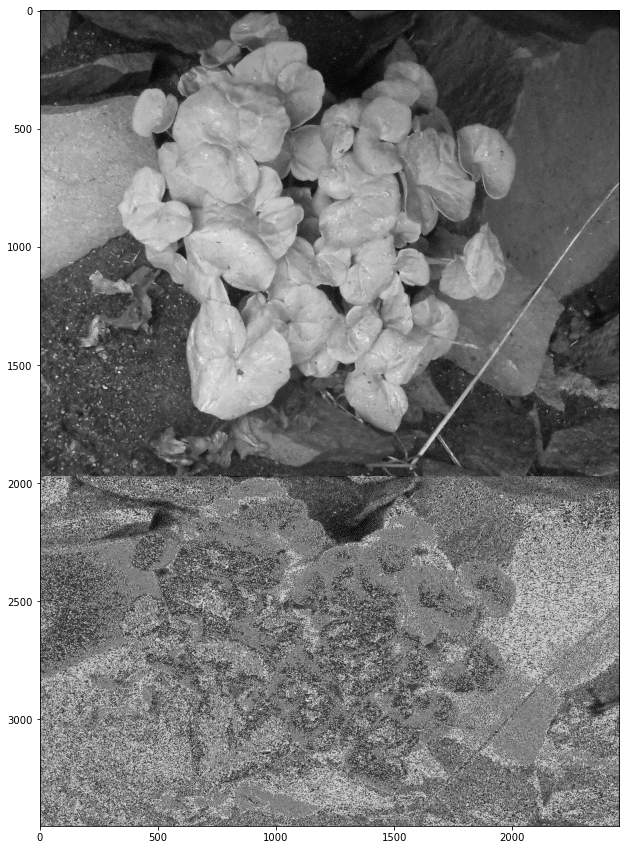

In [205]:
T = T.astype(int)

new = np.array(T, dtype=bool)

plt.figure(figsize=(15, 15))
jello = plt.imshow(new, cmap='gray')
plt.show()
        

In [207]:
def noise_channel(prob_of_switch, Matrix):
    prob = [1-prob_of_switch,prob_of_switch]
    
    Z = np.copy(Matrix)
    

    z_h, z_w = Z.shape

    for h in range(z_h):
        for w in range(z_w):
            noise = np.random.choice(prob,p=[0.9,0.1])
            if noise == 0.1:
                Z[h][w] = (Z[h][w]+1)%2
    return Z


In [209]:
new = noise_channel(0.1,T)

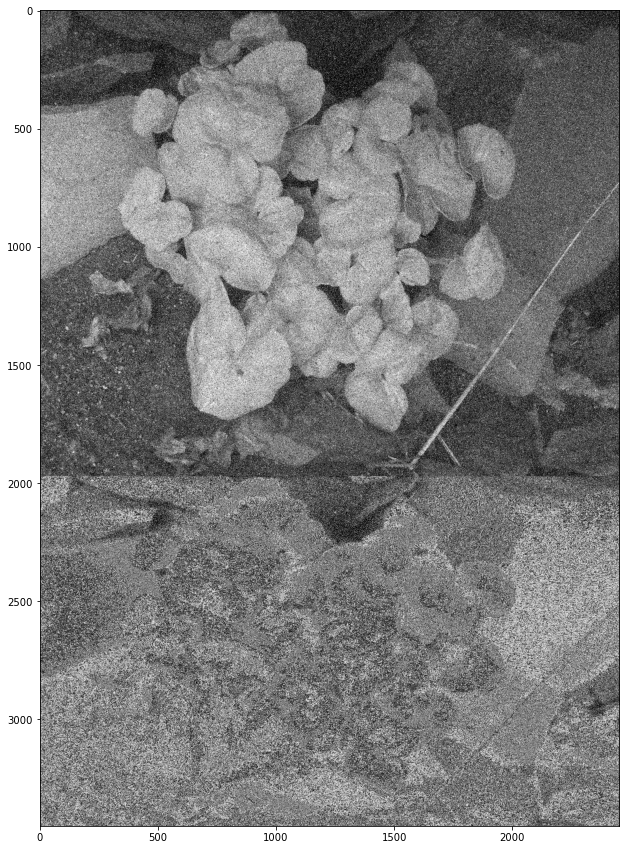

In [210]:
next_noise = np.array(new, dtype=bool)

plt.figure(figsize=(15, 15))
jello = plt.imshow(next_noise, cmap='gray')
plt.show()

In [211]:
H = np.array([[1,1,1,0,1,0,0],[0,1,1,1,0,1,0],[1,0,1,1,0,0,1]])
print(H)

[[1 1 1 0 1 0 0]
 [0 1 1 1 0 1 0]
 [1 0 1 1 0 0 1]]


In [ ]:
new_noise = new_noise.astype(int)
Z = np.zeros((1972, 2452))
k_H, k_w = Z.shape

new_start_h = 0
new_start_h_parity = 0

for w in range(k_W):
    for h in range(k_H):
        t = np.array
        